# Problem Statement
- Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
 

In [2]:
fraud = pd.read_csv("/content/Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud.keys()

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

# Preprocessing data from object to numerical

In [7]:
encoder = preprocessing.LabelEncoder()

In [8]:
fraud["Undergrad"] = encoder.fit_transform(fraud["Undergrad"])
fraud["Marital.Status"] = encoder.fit_transform(fraud["Marital.Status"])
fraud["Urban"] = encoder.fit_transform(fraud["Urban"])

**All variables are converted into numarical**

In [9]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [10]:
fraud["Urban"].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [11]:
fraud.rename(columns={'Marital.Status' : 'mar_status', 'Taxable.Income': 'tax_inc', 'City.Population': 'city_pl',
                    'Work.Experience': 'work_exp'}, inplace= True)

In [12]:
fraud.head()

,Undergrad,mar_status,tax_inc,city_pl,work_exp,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


# Adding column to see texabel income which is <=30000 is Risky or Good

In [13]:
fraud['status'] = fraud['tax_inc'].apply(lambda tax_inc: 'Risky' if tax_inc <= 30000 else 'Good')

In [14]:
fraud

,Undergrad,mar_status,tax_inc,city_pl,work_exp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [15]:
x = fraud.iloc[:,:6]
y = fraud["status"]

In [16]:
x

,Undergrad,mar_status,tax_inc,city_pl,work_exp,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [17]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: status, Length: 600, dtype: object

In [18]:
y.value_counts()

Good     476
Risky    124
Name: status, dtype: int64

**As our values are imblance**

# Splitting Train Test data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

# Building DecisionTreeClassifier with Entropy 

In [20]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
from sklearn import tree

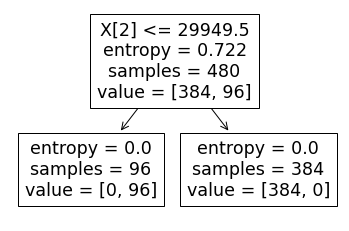

In [22]:
tree.plot_tree(model)
plt.show()

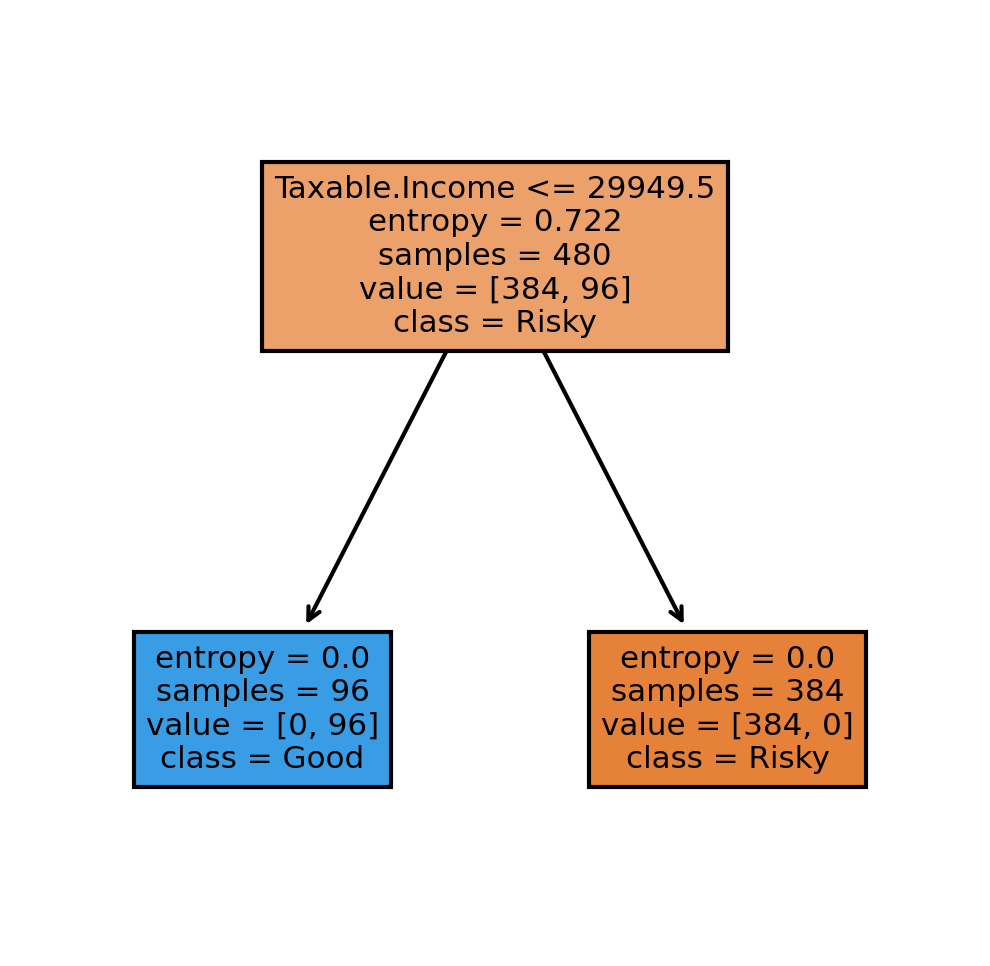

In [23]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [24]:
#predicting on test data
predct = model.predict(x_test)
pd.Series(predct).value_counts()#getting the count of each category

Good     92
Risky    28
dtype: int64

In [25]:
y_test.values

array(['Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Ris

In [26]:
predct

array(['Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Ris

In [27]:
# Compairing predicted value and test value
compar_test = pd.DataFrame(predct,columns=["y_pred"])
compar_test["y_test"]=y_test.values
compar_test

,y_pred,y_test
0,Good,Good
1,Good,Good
2,Good,Good
3,Good,Good
4,Risky,Risky
...,...,...
115,Good,Good
116,Good,Good
117,Good,Good
118,Good,Good


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predct)

array([[92,  0],
       [ 0, 28]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


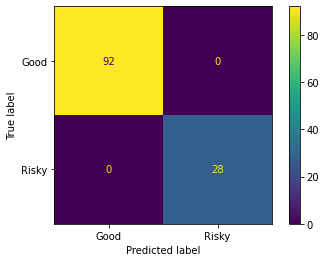

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [30]:
# Checking accuracy
np.mean(predct==y_test)

1.0

In [33]:
from sklearn.metrics import classification_report
print(classification_report(predct,y_test))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        92
       Risky       1.00      1.00      1.00        28

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# Conclusion
- Our model performane is 100%, Our test values ans predicted vlaues are same
- So,  taxable_income <= 30000 as "Risky" will be 28

# Building DeccisionTreeClassfier with Gini

In [31]:
model_gini = DecisionTreeClassifier(criterion="gini", max_depth=4)

In [32]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

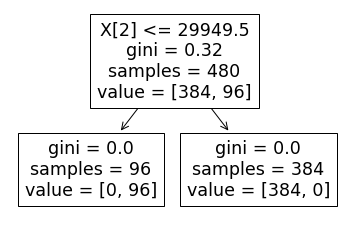

In [34]:
tree.plot_tree(model_gini)
plt.show()

In [35]:
#predicting on test data
predct = model_gini.predict(x_test)
pd.Series(predct).value_counts()#getting the count of each category

Good     92
Risky    28
dtype: int64

In [36]:
# Checking accuracy
np.mean(predct==y_test)

1.0

In [37]:
from sklearn.metrics import classification_report
print(classification_report(predct,y_test))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        92
       Risky       1.00      1.00      1.00        28

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# Conclusion 
- As both are giving same accuracy level